# Pima India Diabetes Dataset- Classification

- Exploratory data analysis
- Predicting the whether a person has diabetes or not given the information

In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

- Dataset didn't have names of columns so added the names according to information

In [2]:
# Importing the dataset
names = ['Pregnency', 'Glucose','BP', 'SkinThickness','Insulin','BMI','Pedigree','Age','Class']
df = pd.read_csv('pima-indians-diabetes.csv', names = names)

In [3]:
#Checking the shape of the dataset
df.shape

(768, 9)

- df.head() and df.tail() is used to see what all features does the dataset contains.
- We can also visualise the complete dataset by using to_string() method

In [4]:
#Checking the head of dataset
df.head()

,Pregnency,Glucose,BP,SkinThickness,Insulin,BMI,Pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnency,Glucose,BP,SkinThickness,Insulin,BMI,Pedigree,Age,Class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


- Target column is 'Class'. 
- In 'Class', 0' means person doesn't have diabetes and '1' means the person has diabetes
- Others columns are features which will help in analysing conditions a diabetic person can have and also predicting it using ML model.

In [6]:
#Checking datatype and number of null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnency      768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BP             768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Class          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- Dataset have 768 rows and 9 columns.
- There are no null values in any column of dataset.
- Also, all the columns are either float or int data-type. Hence, there's no need to clean, fill or convert any column 

In [7]:
#Statistical analysis of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnency,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BP,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


- Checking the statistics of features like mean, standard deviation, count, percentiles etc.
- It helps in understanding the features.

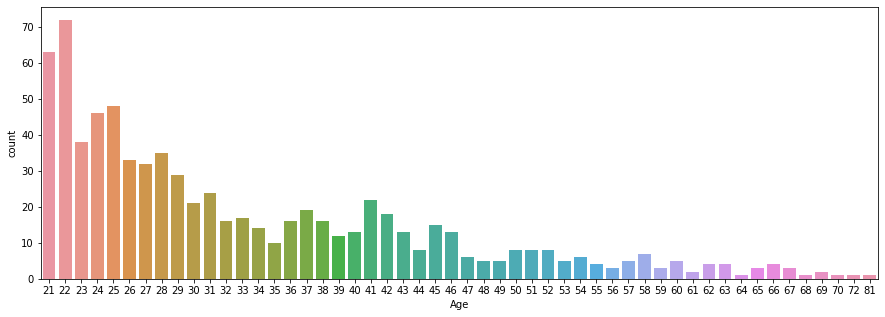

In [8]:
#making countplot of 'Class'/target
plt.figure(figsize=(15,5))
sns.countplot(x= df['Age'])
plt.show()

- Maximum people in dataset are of age less than 41years. 
- A perfect dataset should contain data of all ages in equal count.

## Data Visualisation

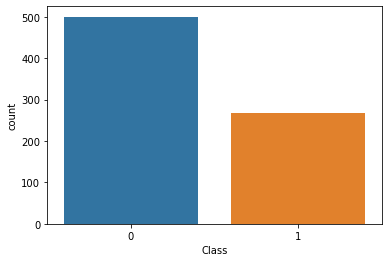

0    500
1    268
Name: Class, dtype: int64


In [9]:
#Countplot of 'Class'
sns.countplot(x=df['Class'])
plt.show()
print(df.Class.value_counts())

- Among data of 768 people, 500 don't have diabetes and 268 have diabetes, which is just 34.8%.
- For better Machine learning prediction there should be 50% data from each category present in dataset.
- This will reduce accuracy as the ML model will have more training on non-diabetic people data, so the precision, recall and accuracy of predicting a non-diabetic will be higher than that of diabetic.
- To resolve this issue, we can randomly take only 268 rows of non-diabtic data, to create a balance in data.
- But this will reduce the size of dataset significantly. Hence, it's not done here.

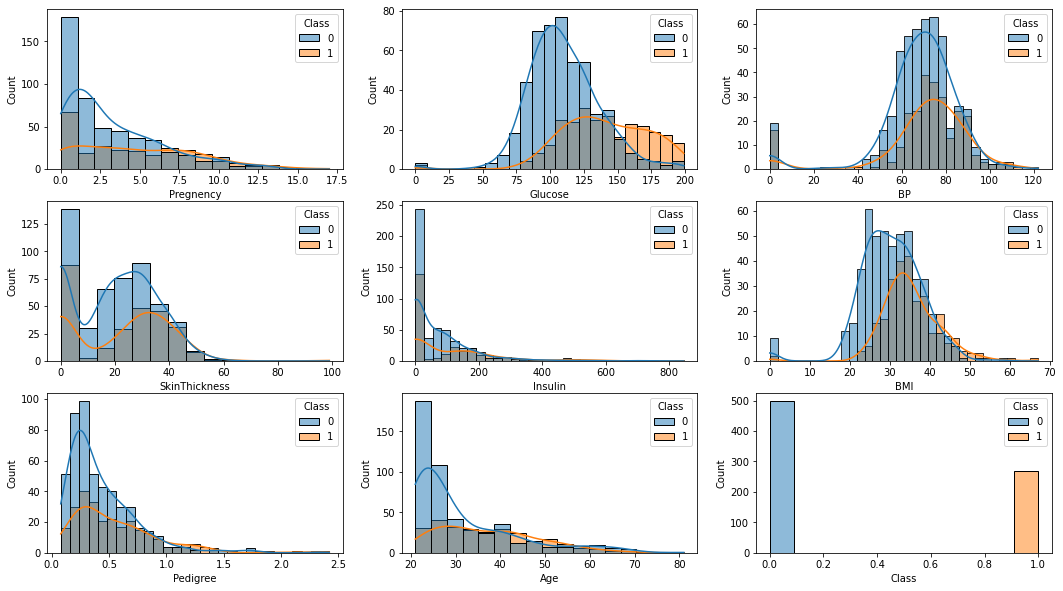

In [10]:
#Making histogram and kde plot to compare the data of diabetic and non-diabetic people.

fig, axes = plt.subplots(3,3, figsize = (18,10))
sns.histplot(ax = axes[0,0], x= 'Pregnency', data =df,kde=True, hue=df['Class'] )
sns.histplot(ax = axes[0,1], x = 'Glucose', data = df,kde=True, hue=df['Class'])
sns.histplot(ax= axes[0,2], x = 'BP', data = df,kde=True, hue=df['Class'])
sns.histplot(ax= axes[1,0], x = 'SkinThickness', data = df,kde=True, hue=df['Class'])
sns.histplot(ax= axes[1,1], x = 'Insulin', data = df,kde=True, hue=df['Class'])
sns.histplot(ax= axes[1,2], x = 'BMI', data = df,kde=True, hue=df['Class'])
sns.histplot(ax= axes[2,0], x = 'Pedigree', data = df,kde=True, hue=df['Class'] )
sns.histplot(ax= axes[2,1], x = 'Age', data = df,kde=True, hue=df['Class'])
sns.histplot(ax= axes[2,2], x = 'Class', data = df,kde=True, hue=df['Class'])
plt.show()

- Pregnency have less affect on diabetes directly so there seems to be less correlation among them.
- Diabetic people have higher glucose level. As the graph represents, after 80 glucose level there is a sharp increase in people having diabetes. 
- According to graph, BP is not much corelated to diabetes. A normal person has BP between 90/60mmHg and 120/80mmHg, while there certainly not much change in that of a diabetic person.
- Diabetes doesn't affect the skin thickness of a person, according to graph. Same goes for Insulin test as well.
- Diabetes does not have a clear pattern of inheritance, although many affected individuals have at least one close family member, such as a parent or sibling, with the disease.

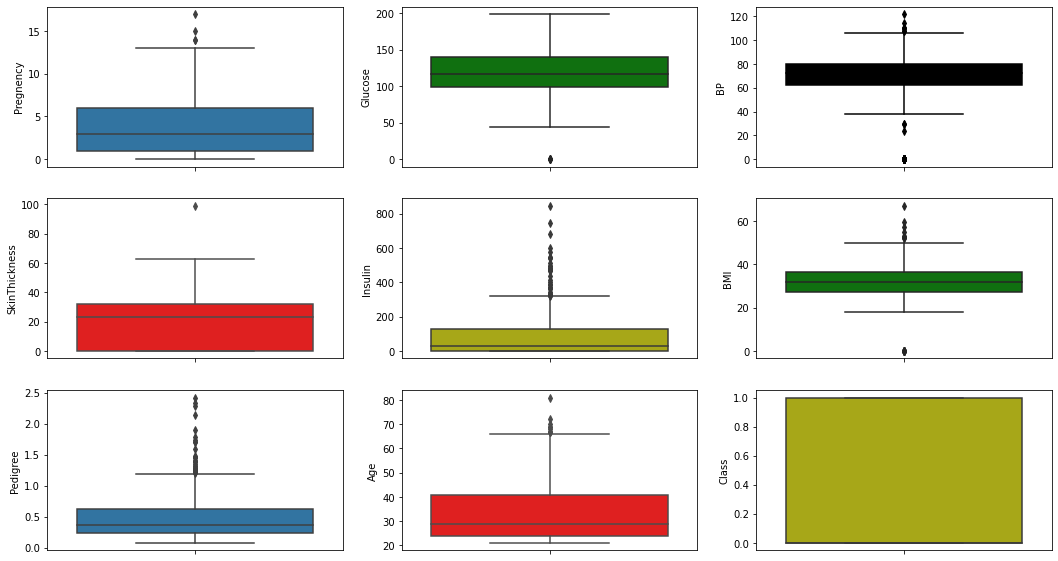

In [11]:
# Box-whisker plots to check outliers in the data
fig, axes = plt.subplots(3,3, figsize = (18,10))
sns.boxplot(ax = axes[0,0], y= 'Pregnency', data =df)
sns.boxplot(ax = axes[0,1], y = 'Glucose', data = df, color='g')
sns.boxplot(ax= axes[0,2], y = 'BP', data = df, color='k')
sns.boxplot(ax= axes[1,0], y = 'SkinThickness', data = df, color='r')
sns.boxplot(ax= axes[1,1], y = 'Insulin', data = df, color='y')
sns.boxplot(ax= axes[1,2], y = 'BMI', data = df, color='g')
sns.boxplot(ax= axes[2,0], y = 'Pedigree', data = df, )
sns.boxplot(ax= axes[2,1], y = 'Age', data = df, color='r')
sns.boxplot(ax= axes[2,2], y = 'Class', data = df, color='y')
plt.show()

- All features have outliers in them.
- An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.
- Outliers affects the accuracy of ML models. Hence, we will remove them.
- Methods to remove outliers:
  - Z-score test to detect then remove observations with values more than 3
  - Using Interquartile range, then removing observations more than 75 percentile and less than 25 percentile.
  - Using Robust Scaler from sklearn.

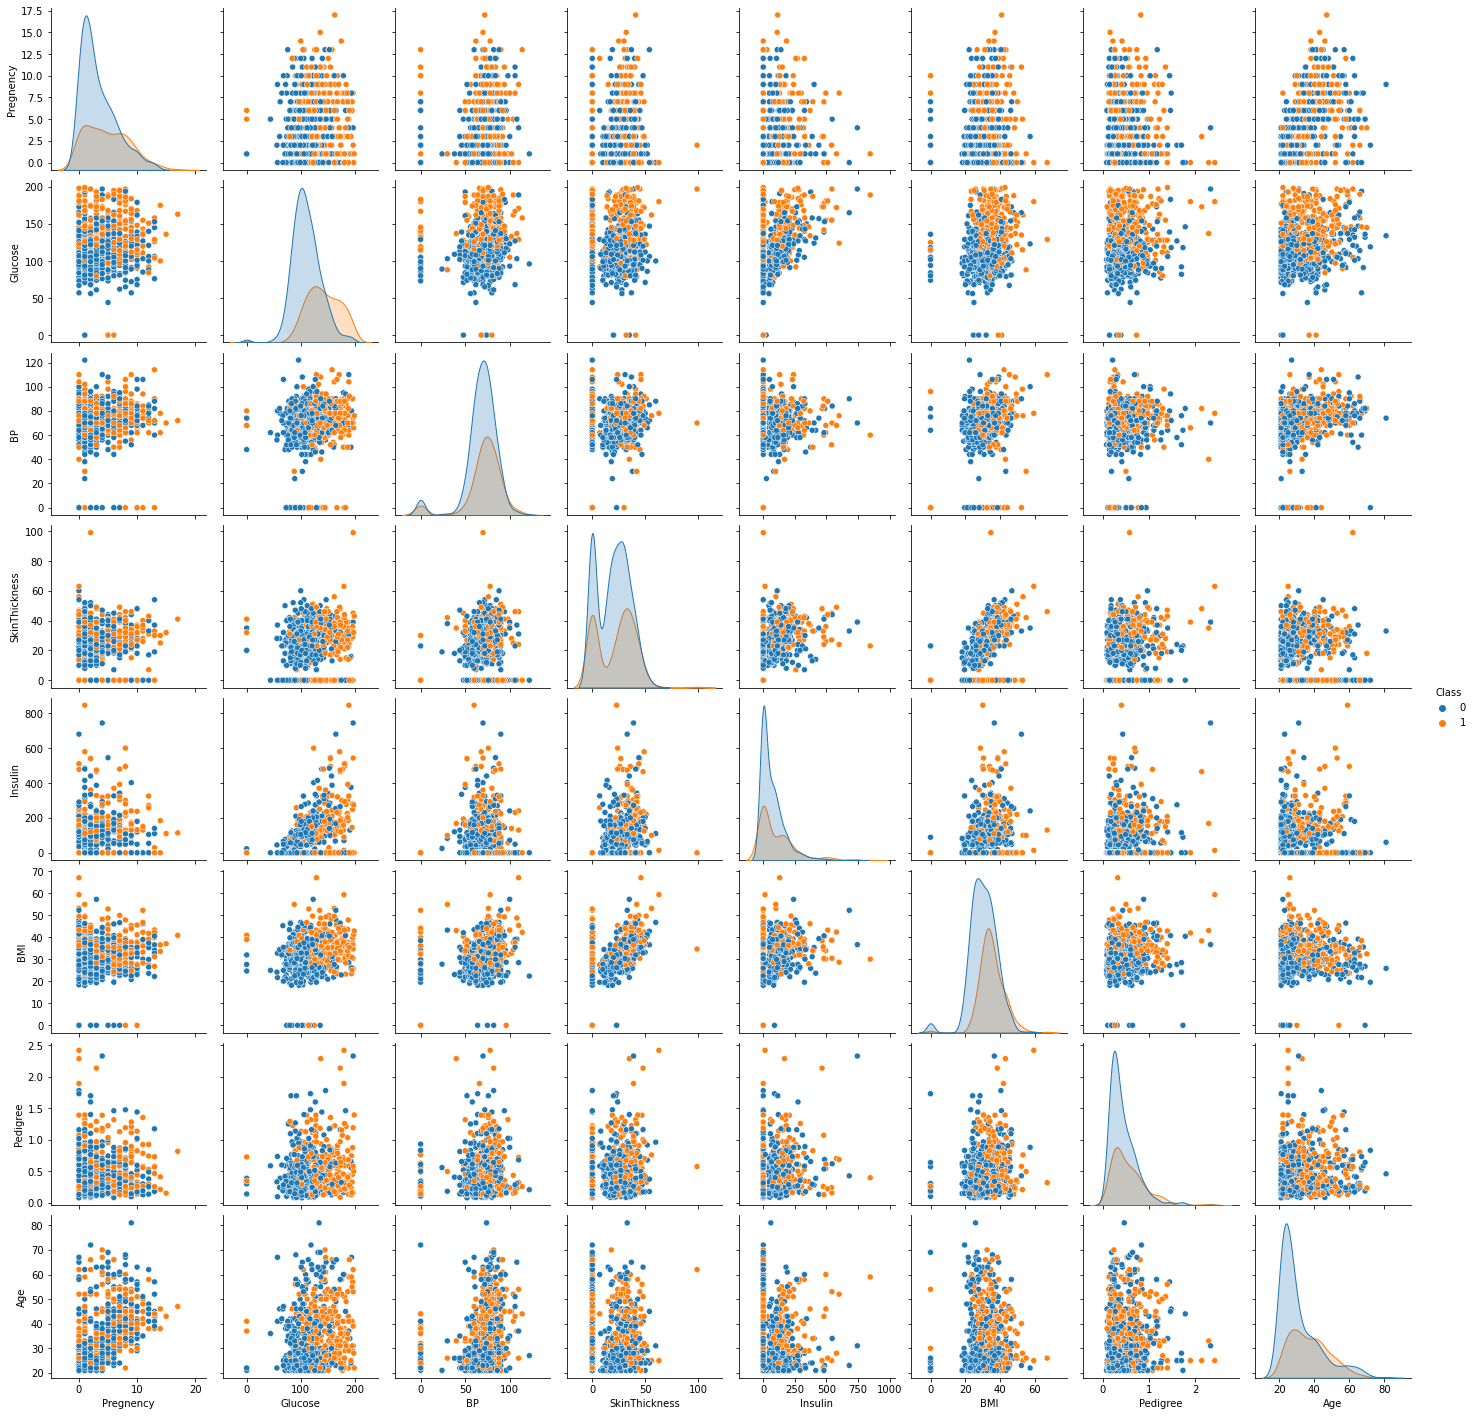

In [12]:
#Pairplot
sns.pairplot(df, hue ='Class')
plt.show()

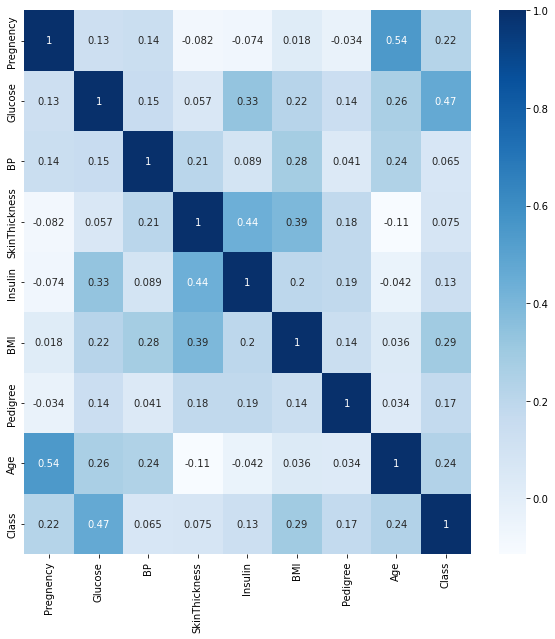

In [13]:
#Heatmap 
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot =True, cmap='Blues')
plt.show()

- Glucose, BMI and Age are the top three most correlated features with target variable.
- Apart from Glucose, other features are not significantly related to target variable.
- Features with correlation less than 0 can even be removed as they won't affect the accuracy significantly.

In [14]:
#Removing outliers using RobustScaler
array = df.values
x= array[:,:-1]
y= array[:,-1]
scaler = RobustScaler().fit(x)
x=scaler.transform(x)

In [15]:
#Using StandardScaler for scaling
scaler = StandardScaler().fit(x)
x = scaler.transform(x)

In [16]:
#Spliting the dataset in train and test 
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.25, random_state =30)

In [17]:
#Using Logistic Regression for prediction
model = LogisticRegression()
model.fit(x_train,y_train)
predict = model.predict(x_test)

- Logistic Regression among other classfication models is giving the best accuracy on this dataset. Hence, it is used.
- To check accuracy, cross validation score and accuracy_score are used.
- f1 score is also used to evaluate the model.

In [18]:
#checking the accuracy and standard deviation of ml model
accuracies = cross_val_score(estimator = model, X = x_test,y = y_test, cv =5)
print(("Accuracy: %.3f%% ") % (accuracies.mean()*100.0))
print(("Standard Deviation: %.3f%% ") % (accuracies.std()*100.0))

Accuracy: 77.085% 
Standard Deviation: 1.890% 


In [19]:
#Checking Cost function using mean_squared_error and mean_absolute_error
print(mean_absolute_error(y_test, predict))
print(mean_squared_error(y_test,predict))
print(np.sqrt(mean_squared_error(y_test,predict)))

0.20833333333333334
0.20833333333333334
0.45643546458763845


______________ Classification Report_________________
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       130
         1.0       0.71      0.60      0.65        62

    accuracy                           0.79       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.79      0.79      0.79       192

         
______________ Accuracy score______________
0.7916666666666666
                         
_____________ Confusion Metrix_____________


<AxesSubplot:>

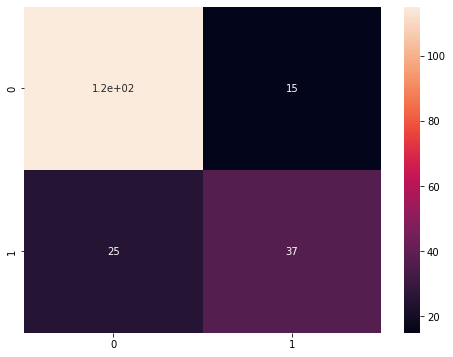

In [20]:
# Checking F1 score, precision, Accuracy and Recall and representing the confusion metrix with heatmap.
print('______________ Classification Report_________________')
print(classification_report(y_test, predict))

print('         ')

print('______________ Accuracy score______________')
print(accuracy_score(y_test, predict))

print('                         ')
print('_____________ Confusion Metrix_____________')
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,predict), annot = True)

- According to classification report, precision, recall and f1 score of predicting a non-diabetic person is high compared to that of a non-diabetic person.
- This is due to unequal number of diabetic and non-diabetic observations. Hence, there are more false negatives than false positives.

##### Conclusion:
- Diabetic patients have high glucose levels.
- Although diabetes isn't directly affected by age but there is increase in diabetes among people with age due to decreased insulin level in body as seen in heatmap.
- Also, people whose parents have diabetes are also have higher risk of diabetes comapred to others, as seen by pedgree feature.